# **Clone the Git Repo**

In [1]:
!git clone https://github.com/projectsolution1110/Face-Recognition.git

Cloning into 'Face-Recognition'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 14 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), done.


# **Change The Directory**

In [2]:
%cd Face-Recognition

/content/Face-Recognition


# **Install the face_recognition Library**

In [3]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=0398dec8aadd86cffbd9ff4c5cd84824f0ff6623fc10c75beb86e991e396e81b
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


# **Mount your Google Drive**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Upload your own images**

In [7]:
!cp /content/drive/My\ Drive/Face_Recognition/Picture.zip /content/Face-Recognition/
!unzip Picture.zip

Archive:  Picture.zip
  inflating: Picture/1.jpeg          
  inflating: Picture/2.jpeg          
  inflating: Picture/3.jpeg          
  inflating: Picture/4.jpeg          
  inflating: Picture/5.jpeg          
  inflating: Picture/6.jpeg          
  inflating: Picture/7.jpeg          


# **Training Images**

In [8]:
import glob, os
import random
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display
from google.colab.patches import cv2_imshow
import cv2
from datetime import datetime

dataset_path = '/content/Face-Recognition/Picture'
tr=0
name="Emam"

for pathAndFilename in glob.iglob(os.path.join(dataset_path, "*.jpeg")):
    title, ext = os.path.splitext(os.path.basename(pathAndFilename))
    os.system(f"cp {dataset_path}/{title}.jpeg Face-Recognition")
    tr = tr + 1
    face_1 = face_recognition.load_image_file("{}/{}.jpeg".format(dataset_path, title))
    face_1_encoding = face_recognition.face_encodings(face_1)[0]
    known_face_encodings = [
    face_1_encoding
    ]
    known_face_names = [
    "{}".format(name)
    ]


print("Done learning and creating profiles")
print("Total image {}".format(tr))

Done learning and creating profiles
Total image 7


# **Initializing function to add names to the "dataset.csv" file**

In [9]:
def makeAttendanceEntry(name):
    with open('dataset.csv','r+') as FILE:
        allLines = FILE.readlines()
        attendanceList = []
        for line in allLines:
            entry = line.split(',')
            attendanceList.append(entry[0])
        if name not in attendanceList:
            now = datetime.now()
            dtString = now.strftime('%d/%b/%Y, %H:%M:%S')
            f.writelines(f'\n{name},{dtString}')

# **Performing Face Recognition and Entering Attendance with time-stamp**

In [10]:
%cd /content/Face-Recognition/Picture

/content/Face-Recognition/Picture


Emam


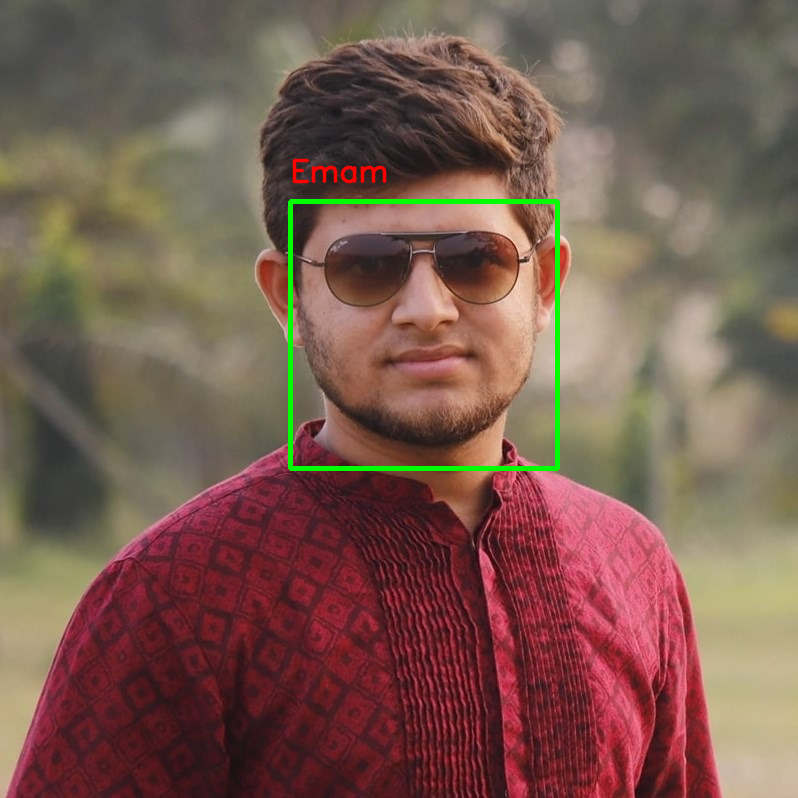

In [11]:
file_name = "1.jpeg"
unknown_image = face_recognition.load_image_file(file_name)
unknown_image_to_draw = cv2.imread(file_name)

face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

pil_image = Image.fromarray(unknown_image)
draw = ImageDraw.Draw(pil_image)

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    cv2.rectangle(unknown_image_to_draw,(left, top), (right, bottom), (0,255,0),3 )
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 255, 255))
    cv2.putText(unknown_image_to_draw,name,(left,top-20), cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2,cv2.LINE_AA)
    print(name)
    #makeAttendanceEntry(name)

# display(pil_image)
cv2_imshow(unknown_image_to_draw)